# Weather Report

### Import all needed library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os,csv
import pandas as pd

### Read weather data from Jefferson lab web page and add to lists

In [2]:
dates = []
temp = []
heat = []
humidity = []
pressure = []
wind = []
with open(os.path.join( "..","data", "weather_09_01-08.csv")) as file:
    reader = csv.reader(file)
    for line in reader:
        dates.append(line[0])
        temp.append(line[1])
        heat.append(line[2])
        humidity.append(line[3])
        pressure.append(line[4])
        wind.append(line[5])

### Conversed all lists to numby array

In [3]:
dates = np.array(dates, dtype = np.datetime64)
temp = np.array(temp, dtype = np.float64)
heat = np.array(heat, dtype = np.float64)
humidity = np.array(humidity, dtype = np.float64)
pressure = np.array(pressure, dtype = np.float64)
wind = np.array(wind, dtype = np.float64)

### Plot one day temperature from given data set

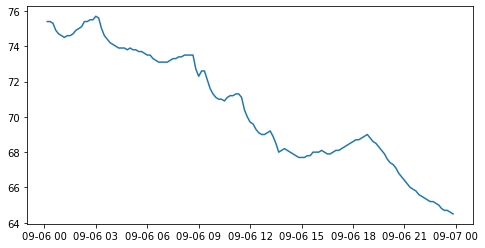

In [4]:
sept6 = np.datetime64("2019-09-06T00:00")
sept7 = np.datetime64("2019-09-07T00:00")

sept6_boolean = (dates > sept6) & (dates < sept7)
sept7_boolean = (dates > sept6) & (dates < sept7)
plt.figure(figsize=(8,4))
plt.plot(dates[sept6_boolean], temp[sept7_boolean])
plt.show()

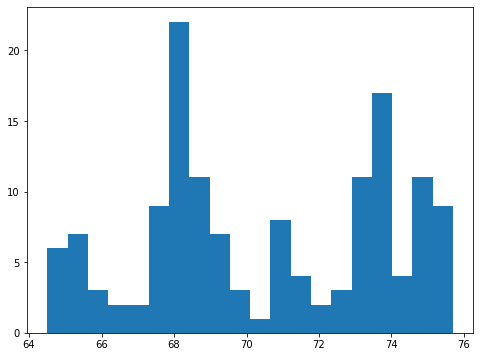

In [5]:
plt.figure(figsize=(8,6))
plt.hist(temp[sept6_boolean],  bins = 20)
plt.show()

### Mean temperature in September 6

In [6]:
temp[sept6_boolean].mean()

70.48802816901409

### Standard deviation of temperature in September 6

In [7]:
temp[sept6_boolean].std()

3.284459404022418

In [8]:
temp_means = []
temp_stds = []
temp_dates = []
for i in range(1, 8):
    date_min = np.datetime64(f"2019-09-{i:02d}T00:01")
    date_max = np.datetime64(f"2019-09-{i+1:02d}T00:01")
    one_day_boolean = (dates > date_min) & (dates < date_max)
    
    temp_means.append(temp[one_day_boolean].mean())
    temp_stds.append(temp[one_day_boolean].std())
    temp_dates.append(date_min)

### Plotted mean and standard deviation for error bars by day of week

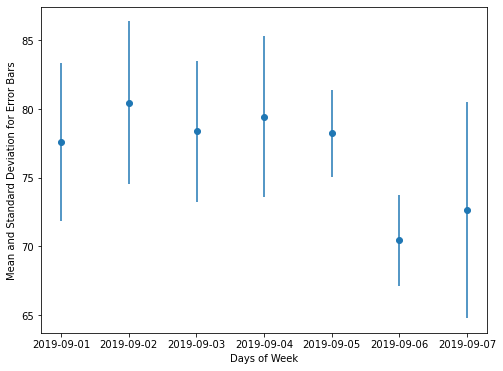

In [9]:
plt.figure(figsize=(8, 6))
plt.errorbar(temp_dates, temp_means, yerr=temp_stds, fmt="o")
plt.xlabel('Days of Week')
plt.ylabel('Mean and Standard Deviation for Error Bars')
plt.show()

In [10]:
all_data = pd.read_csv("../data/weather_09_01-08.csv")
data_header = pd.read_csv("../data/DATA-201-Chapter3-HomeWork.csv")
all_data.head()

,2019-09-01T00:10,73.000,75.330,64.700,30.120,0.000
0,2019-09-01T00:20,72.9,75.230,64.7,30.125,0.0
1,2019-09-01T00:30,72.8,75.244,65.7,30.125,0.0
2,2019-09-01T00:40,72.6,75.044,65.7,30.125,0.0
3,2019-09-01T00:50,72.4,74.844,65.7,30.127,0.0
4,2019-09-01T01:00,72.2,74.760,66.7,30.129,0.0


In [11]:
data_header.head()

,1,2,3,4,5,6,7,8,9,10,...,58,59,60,61,62,63,64,65,66,67
0,DATE (YYYYMonthDayHourMinute),WIND DIR,WIND SPD,GUST,IN HUM,OUT HUM,IN TEMP,OUT TEMP,BARO,TOT RAIN,...,DEGREE DAYS HEATING DAILY,DEGREE DAYS COOLING DAILY,MOON PHASE,MONTHLY RAIN,DEGREE DAYS HEATING MONTHLY,DEGREE DAYS COOLING MONTHLY,NaN,DEGREE DAYS HEATING YEARLY,DEGREE DAYS COOLING YEARLY,NaN


## Add header for data set

In [12]:
header_name = ['date_time','temperature','heat_index','humidity','barometric_pressure','wind_speed']
all_data_with_header = pd.read_csv("../data/weather_09_01-08.csv", header=None,skiprows=1,names=header_name)

In [13]:
all_data_with_header.head()

,date_time,temperature,heat_index,humidity,barometric_pressure,wind_speed
0,2019-09-01T00:20,72.9,75.230,64.7,30.125,0.0
1,2019-09-01T00:30,72.8,75.244,65.7,30.125,0.0
2,2019-09-01T00:40,72.6,75.044,65.7,30.125,0.0
3,2019-09-01T00:50,72.4,74.844,65.7,30.127,0.0
4,2019-09-01T01:00,72.2,74.760,66.7,30.129,0.0


### Histogram of temperature for the entire week

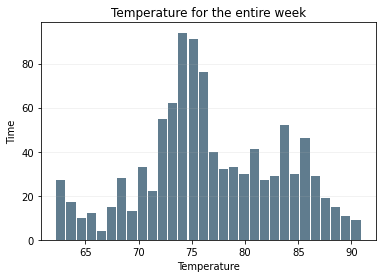

In [14]:

plt.hist(all_data_with_header['temperature'], bins=30, color = '#607c8e',rwidth=0.9)

plt.xlabel('Temperature')
plt.ylabel('Time')
plt.title('Temperature for the entire week')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of Heat Index for the entire week

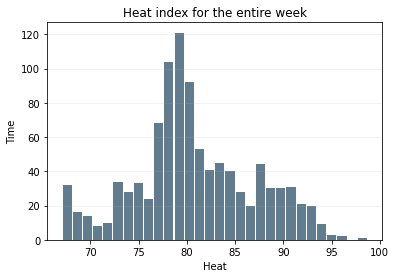

In [15]:
plt.hist(all_data_with_header['heat_index'], bins=30, color = '#607c8e',rwidth=0.9)

plt.xlabel('Heat')
plt.ylabel('Time')
plt.title('Heat index for the entire week')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of humididy for the entire week

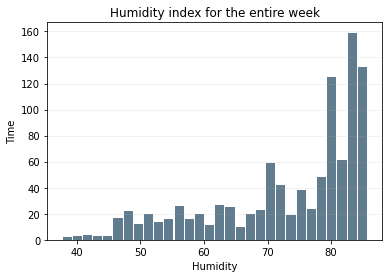

In [16]:
plt.hist(all_data_with_header['humidity'], bins=30, color = '#607c8e',rwidth=0.9)

plt.xlabel('Humidity')
plt.ylabel('Time')
plt.title('Humidity index for the entire week')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of the Barometric Pressure for the entire week

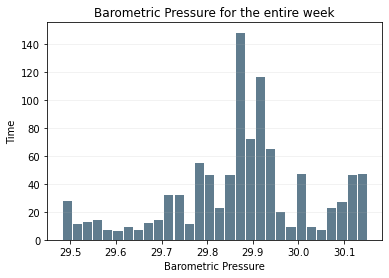

In [17]:
plt.hist(all_data_with_header['barometric_pressure'], bins=30, color = '#607c8e',rwidth=0.9)

plt.xlabel('Barometric Pressure')
plt.ylabel('Time')
plt.title('Barometric Pressure for the entire week')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of the wind speed for the entire week

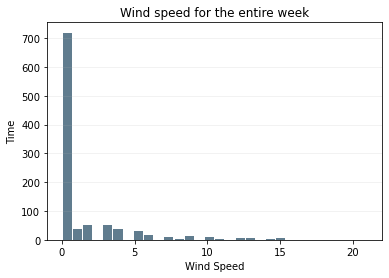

In [18]:
plt.hist(all_data_with_header['wind_speed'], bins=30, color = '#607c8e',rwidth=0.9)

plt.xlabel('Wind Speed')
plt.ylabel('Time')
plt.title('Wind speed for the entire week')
plt.grid(axis='y', alpha=0.2)
plt.show()

In [19]:
all_data_with_header.head()

,date_time,temperature,heat_index,humidity,barometric_pressure,wind_speed
0,2019-09-01T00:20,72.9,75.230,64.7,30.125,0.0
1,2019-09-01T00:30,72.8,75.244,65.7,30.125,0.0
2,2019-09-01T00:40,72.6,75.044,65.7,30.125,0.0
3,2019-09-01T00:50,72.4,74.844,65.7,30.127,0.0
4,2019-09-01T01:00,72.2,74.760,66.7,30.129,0.0


In [20]:
hurican_day = all_data_with_header

In [21]:
hurican_day['new_data_column'] = pd.to_datetime(hurican_day['date_time'])
hurican_day['new_day_column'] = hurican_day['new_data_column'].dt.day

In [22]:
print(hurican_day.groupby(hurican_day['new_data_column'].dt.day == 6))

In [23]:
hurican_day.tail()

,date_time,temperature,heat_index,humidity,barometric_pressure,wind_speed,new_data_column,new_day_column
997,2019-09-07T23:10,72.0,74.916,69.7,29.871,0.0,2019-09-07 23:10:00,7
998,2019-09-07T23:20,71.8,74.837,70.7,29.868,0.0,2019-09-07 23:20:00,7
999,2019-09-07T23:30,71.6,74.637,70.7,29.872,0.0,2019-09-07 23:30:00,7
1000,2019-09-07T23:40,71.3,74.337,70.7,29.872,0.0,2019-09-07 23:40:00,7
1001,2019-09-07T23:50,71.2,74.237,70.7,29.874,0.0,2019-09-07 23:50:00,7


## Histogram of the day that the hurican passed by

In [24]:
sept1 = np.datetime64("2019-09-01T00:00")
sept2 = np.datetime64("2019-09-02T00:00")

sept1_boolean = (dates > sept1) & (dates < sept2)
sept2_boolean = (dates > sept1) & (dates < sept2)

### Histogram of temperature the day the hurican passed by

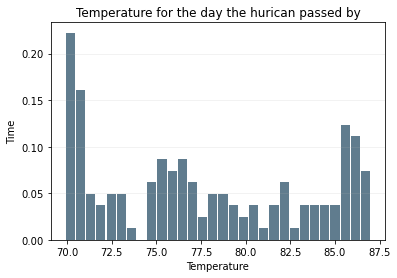

In [25]:
plt.hist(temp[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Temperature')
plt.ylabel('Time')
plt.title('Temperature for the day the hurican passed by')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of the heat index the day the hurican passed by


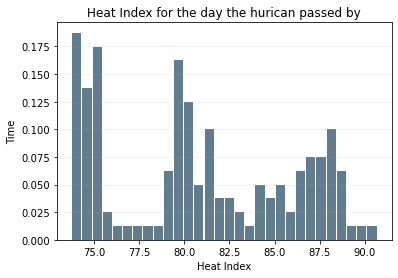

In [26]:
plt.hist(heat[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Heat Index')
plt.ylabel('Time')
plt.title('Heat Index for the day the hurican passed by')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of the humidity the day the hurican passed by

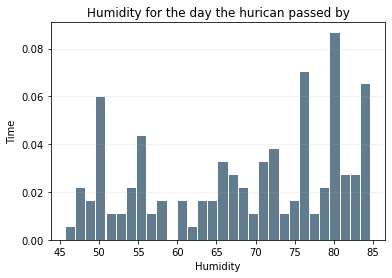

In [27]:
plt.hist(humidity[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Humidity')
plt.ylabel('Time')
plt.title('Humidity for the day the hurican passed by')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of the barometric_pressure the day the hurican passed by

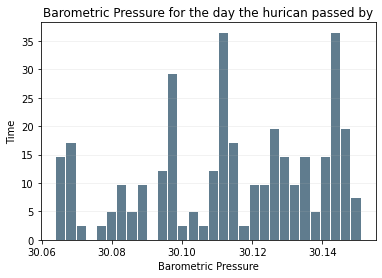

In [28]:
plt.hist(pressure[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Barometric Pressure')
plt.ylabel('Time')
plt.title('Barometric Pressure for the day the hurican passed by')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of the wind speed the day the hurican passed by

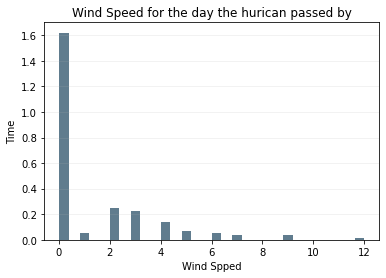

In [29]:
plt.hist(wind[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Wind Spped')
plt.ylabel('Time')
plt.title('Wind Speed for the day the hurican passed by')
plt.grid(axis='y', alpha=0.2)
plt.show()

### Histogram of all variable during the hurican day vs the entire week

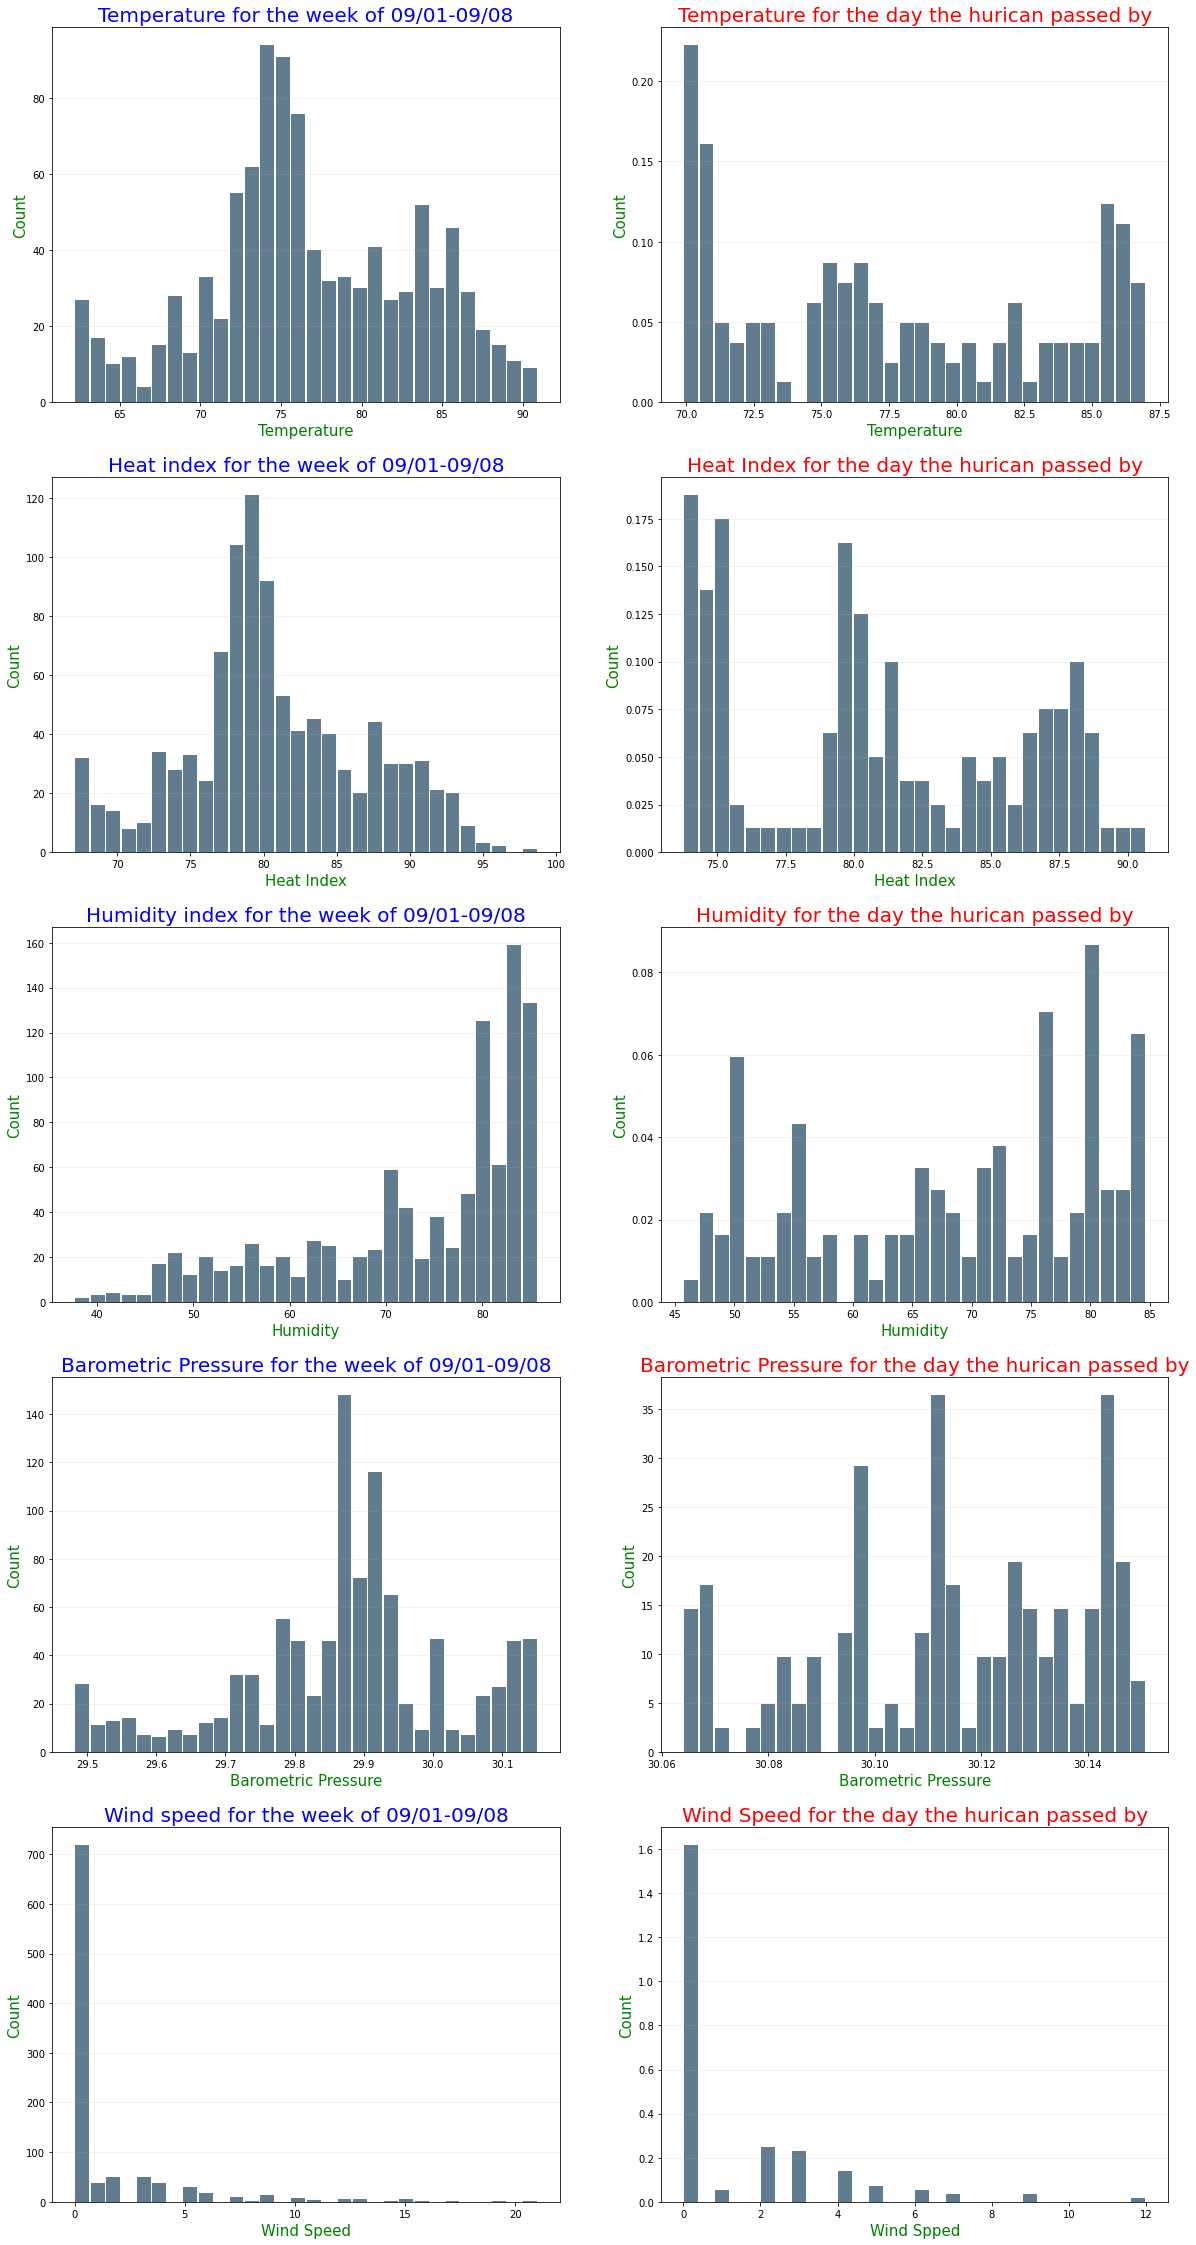

In [30]:
plt.figure(figsize = (20,40))

plt.subplot(5,2,1)
plt.hist(all_data_with_header['temperature'], bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Temperature',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Temperature for the week of 09/01-09/08',fontsize = 20,color = 'blue')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,2)
plt.hist(temp[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Temperature',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Temperature for the day the hurican passed by',fontsize = 20,color = 'red')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,3)
plt.hist(all_data_with_header['heat_index'], bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Heat Index',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Heat index for the week of 09/01-09/08',fontsize = 20,color = 'blue')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,4)
plt.hist(heat[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Heat Index',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Heat Index for the day the hurican passed by',fontsize = 20,color = 'red')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,5)
plt.hist(all_data_with_header['humidity'], bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Humidity',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Humidity index for the week of 09/01-09/08',fontsize = 20,color = 'blue')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,6)
plt.hist(humidity[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Humidity',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Humidity for the day the hurican passed by',fontsize = 20,color = 'red')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,7)
plt.hist(all_data_with_header['barometric_pressure'], bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Barometric Pressure',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Barometric Pressure for the week of 09/01-09/08',fontsize = 20,color = 'blue')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,8)
plt.hist(pressure[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Barometric Pressure',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Barometric Pressure for the day the hurican passed by',fontsize = 20,color = 'red')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,9)
plt.hist(all_data_with_header['wind_speed'], bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Wind Speed',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Wind speed for the week of 09/01-09/08',fontsize = 20,color = 'blue')
plt.grid(axis='y', alpha=0.2)

plt.subplot(5,2,10)
plt.hist(wind[sept1_boolean],density=True, bins=30, color = '#607c8e',rwidth=0.9)
plt.xlabel('Wind Spped',fontsize = 15, color = 'green')
plt.ylabel('Count',fontsize = 15, color = 'green')
plt.title('Wind Speed for the day the hurican passed by',fontsize = 20,color = 'red')
plt.grid(axis='y', alpha=0.2)